## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [1]:
import os
os.getcwd()


'C:\\Users\\HSU\\D5_如何新建一個dataframe_\\範例檔案'

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [2]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [3]:
import requests
data_url = requests.get(target_url)
data = data_url.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [4]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)

print(len(data))

data[-5:]

9996


['n00433802_5202\thttp://farm2.static.flickr.com/1130/960179413_0002e006f0.jpg?v=0',
 'n00433802_5204\thttp://static.flickr.com/150/387324732_f8149d0c65.jpg',
 'n00433802_5208\thttp://3.bp.blogspot.com/_9T2cRtlgHV0/SK55RHaybXI/AAAAAAAAAwY/VuzoyOGFARQ/s400/Eleni-Andriola-of-Greece4.jpg',
 'n00433802_5211\thttp://www.loudoungymnastics.com/images/Girls_doing_split%20jpg.jpg',
 '']

In [5]:
data = data[:-1]
print(len(data))

9995


In [6]:
num = []
url = []

for i in range(len(data)):
    data_new = data[i].split('\t')
    num.append(data_new[0])
    url.append(data_new[1])
    
num[0:5]+url[0:5]
#data_new[0:5]

['n00015388_157',
 'n00015388_238',
 'n00015388_304',
 'n00015388_327',
 'n00015388_355',
 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']

## 將 txt 轉成 pandas dataframe

In [7]:
import pandas as pd

arrange_data = {'number':num,'link':url}
df = pd.DataFrame(arrange_data)
df.head()


,number,link
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

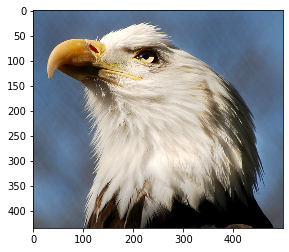

In [8]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,'link']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [9]:
df[0:5]['link'].values

array(['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
       'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
       'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
       'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
       'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg'],
      dtype=object)

In [62]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    index = 0
    for url in url_list:
        try:   #some code that may raise an exception
            index += 1
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            img_list.append(img)
        except Exception as e:
            print(f"Error occurred at image {index}: {url}")
            print(f"Error message: {e}")
            
    return img_list

Error occurred at image 5: http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Error message: cannot identify image file <_io.BytesIO object at 0x00000186CF0E1948>
Total images that we got: 4 


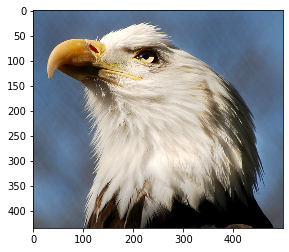

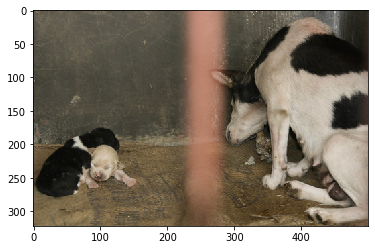

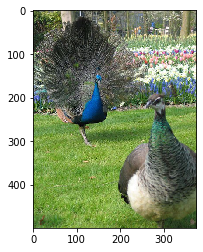

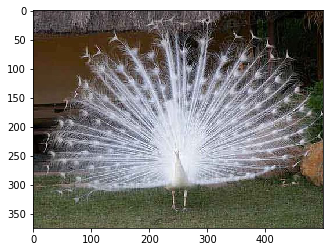

In [63]:
result = img2arr_fromURLs(df[0:5]['link'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()